# `ES 157` Notebook 2: Convolution and Systems

This week we'll look more into the _properties_ of systems and experiment with _convolution_.

At the end of this notebook you will know
1. how to create impulse responses,
2. how to test linearity and timy invariance in `Python`,
3. how to write your own version of signal convolution, and
3. how to convolve signals.

As we did last week, let us import some needed libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

## (Optional) Write up your own convolution! 🤓

Let us begin by trying to write our own version of convolution. If you're struggling, feel free to skip this step and work with `scipy`'s version instead to complete the notebook. Remember that the definition of convolution of two signals is given by
<center>$x[n] * y[n] = \sum_{k=-\infty}^{\infty} x[k]y[n-k]$.</center>

In [3]:
def convolve(x, y):
    '''Function that computes the convolution between two 1-D signals.'''
    
    N = len(x)
    L = len(y)
    
    w = np.zeros((N + L - 1,))
    
    for idx in range(N + L - 1):
        for jdx in range(max(N, L)):
            if idx - jdx < 0:
                continue
            if idx - jdx >= L:
                continue
            if jdx >= N:
                continue
                
            w[idx] += x[jdx] * y[idx - jdx]
    return w

Let's test our implementation and make sure that it is consistent with `scipy`'s implementation. Let's create and convolve two random signals with `N=10` and `L=8`.

In [4]:
N = 10
L = 8

# generate the random signals
x = np.random.randn(N)
y = np.random.randn(L)

# check that the outputs are the same
print("The two convolutions are the same: {}".format((convolve(x, y) == signal.convolve(x, y)).all()))

The two convolutions are the same: True


## Impulse responses and convolution

Let us now examine a few simple impulse responses and make sure that they have the expected effect. First, plot the random signal $x[n]$. Then, generate a _unit impulse_, convolve it with $x[n]$, and plot the result.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

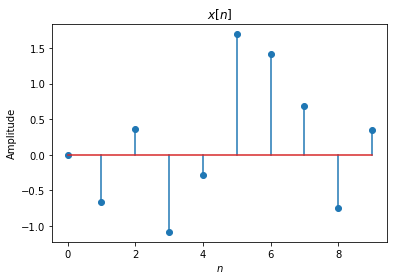

In [5]:
# plot the signal as a stemplot
plt.stem(x)
plt.title("$x[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

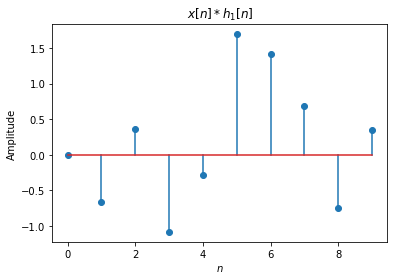

In [6]:
# create the impulse response
h_1 = np.ones((1,))

# convolve it with x
w_1 = convolve(x, h_1)

# plot the signal as a stemplot
plt.stem(w_1)
plt.title("$x[n] * h_1[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

Let's now examine a different system impulse; namely consider a _unit step function_ of length `L`. Can you guess what the convolution with $x[n]$ will look like? What about the convolution with itself? Compute and plot both.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Amplitude')

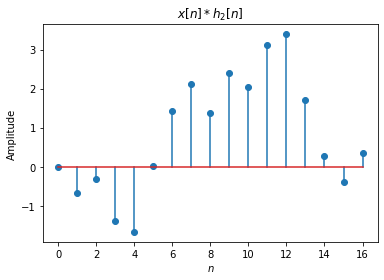

In [7]:
# create unit step function
h_2 = np.ones((L,))

# convolve it with x
w_2 = convolve(x, h_2)

# plot the figure as a stemplot
plt.stem(w_2)
plt.title("$x[n] * h_2[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0, 0.5, 'Amplitude')

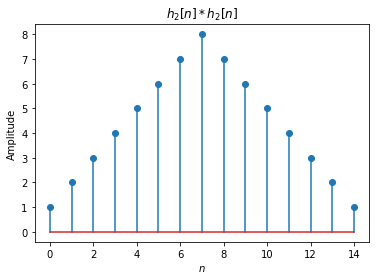

In [8]:
# now convolve the unit step with itself
w_3 = convolve(h_2, h_2)

# plot the figure as a stemplot
plt.stem(w_3)
plt.title("$h_2[n] * h_2[n]$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")

## Linearity and time-invariance

Let's turn our attention now to the fundamental properties of _linearity_ and _time-invariance_. First, consider the system $g(x[n]) = x^2[n]$. Is this system linear and time-invariant? We would like to examine that, numerically. First, create a `lambda` function that applies the effect of the system $g(\cdot)$.

In [7]:
# create a function to model the system
g = lambda x: [x[idx] ** 2 for idx in range(len(x))]

# evaluate your function on the random signal x
g_1 = g(x)

Now let us test linearity. Remember, linearity is defined as
<center>$g(x[n] + y[n]) = g(x[n]) + g(y[n])$.</center>
Our previous random signals were of different lengths. This is not a problem for linearity; however, we would need to handle this numerically. To avoid convoluting things (😎) let's recreate the random signals to have equal lengths.

In [8]:
# generate two random signals of length N
x = np.random.random(N)
y = np.random.random(N)

# evaluate your function on each random signal
g_2 = g(x)
g_3 = g(y)

# evaluate g() on the sum of x and y
g_4 = g(x + y)

Having computed everything, let's test if the system is linear.

In [9]:
# test linearity
print("The system is linear: {}".format(g_2 + g_3 == g_4))

The system is linear: False


Now let's examine time-invariance. As a reminder, a system is considered to be time-invariant if it holds that
<center>$g(x[n - n_0]) = g(x[n]) * \delta[n - n_0]$,</center>
which is a fancy way of writing a delayed version of $g(x[n])$. Delay $x[n]$ by $d = 4$ and pass it through $g(\cdot)$. Then, compute a delayed version of $g(x[n])$ which we generated before.

In [10]:
d = 4

# delay x by d
delay = np.zeros((d,))
x_d = np.concatenate((delay, x))

# pass the delayed version through the system
g_5 = g(x_d)

# delay g(x[n]) by d
g_6 = np.concatenate((delay, g_2))

Having computed everything, let's test if the system is time-invariant.

In [11]:
# test time-invariance
print("The system is time-invariant: {}".format((g_5 == g_6).all()))

The system is time-invariant: True


That's all for this week! I hope you enjoyed getting some experience with convolution and impulse responses, and hopefully the concepts of linearity and time-invariance are a bit clearer now. Please take a minute to fill out this week's feedback [form](https://docs.google.com/forms/d/e/1FAIpQLSdTWxoKujEifbACn4HB3W1EPZlmi55g-gFlKtcSFf1F99Z86g/viewform?usp=sf_link).